# Package loading and basic configurations

In [4]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, TimeSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [5]:
#bounding box selector for Dortmund, North Rhine Westphalia |EmekaK| for a period of
bbox = BboxSelector([
    7.417991771484375, # min_x
    51.46800145325402, # min_y
    7.491963988769531, # max_x
    51.552168482608728  # max_y
])

time_interval = TimeSelector(
    '2014-08-23T14:22:18Z',
    '2020-02-07T22:27:35Z'
)

# issue a query for the first five columns with .head() method
track_df = track_api.get_tracks(bbox=bbox, time_interval=time_interval, num_results=10)
track_df

CO2.unit  CO2.value Consumption.unit  Consumption.value Engine Load.unit  \
0        NaN        NaN              NaN                NaN                %   
1        NaN        NaN              NaN                NaN                %   
2        NaN        NaN              NaN                NaN                %   
3        NaN        NaN              NaN                NaN                %   
4        NaN        NaN              NaN                NaN                %   
..       ...        ...              ...                ...              ...   
241     kg/h   7.956718              l/h           3.385838              NaN   
242     kg/h   8.003068              l/h           3.405561              NaN   
243     kg/h   9.370388              l/h           3.987399              NaN   
244     kg/h   5.446103              l/h           2.317491              NaN   
245     kg/h   7.052897              l/h           3.001233              NaN   

     Engine Load.value GPS Accuracy.unit  GPS Accuracy.value  \
0            24.750908                 %            9.648001   
1            33.664916                 %           10.171660   
2            18.897090                 %            9.648001   
3            20.398114                 %           12.864000   
4            22.642817                 %            9.981393   
..                 ...               ...                 ...   
241                NaN                 %            4.000000   
242                NaN                 %            4.000000   
243                NaN                 %            3.000000   
244                NaN                 %            3.000000   
245                NaN                 %            3.000000   

    GPS Altitude.unit  GPS Altitude.value  ... sensor.fuelType  \
0                   m          142.000000  ...          diesel   
1                   m          139.534535  ...          diesel   
2                   m          130.108434  ...          diesel   
3                   m          126.407855  ...          diesel   
4                   m          122.311000  ...          diesel   
..                ...                 ...  ...             ...   
241                 m          155.000000  ...        gasoline   
242                 m          154.000000  ...        gasoline   
243                 m          152.000000  ...        gasoline   
244                 m          150.000000  ...        gasoline   
245                 m          148.000000  ...        gasoline   

                    sensor.id sensor.manufacturer  sensor.model sensor.type  \
0    5de9edc23bdb691868e95b69          Volkswagen          Golf         car   
1    5de9edc23bdb691868e95b69          Volkswagen          Golf         car   
2    5de9edc23bdb691868e95b69          Volkswagen          Golf         car   
3    5de9edc23bdb691868e95b69          Volkswagen          Golf         car   
4    5de9edc23bdb691868e95b69          Volkswagen          Golf         car   
..                        ...                 ...           ...         ...   
241  53f8672ce4b04c314e7cc01a             Suzuki    Swift Sport         car   
242  53f8672ce4b04c314e7cc01a             Suzuki    Swift Sport         car   
243  53f8672ce4b04c314e7cc01a             Suzuki    Swift Sport         car   
244  53f8672ce4b04c314e7cc01a             Suzuki    Swift Sport         car   
245  53f8672ce4b04c314e7cc01a             Suzuki    Swift Sport         car   

                    time           track.begin             track.end  \
0    2020-02-07T21:37:55  2020-02-07T21:37:55Z  2020-02-07T22:27:35Z   
1    2020-02-07T21:38:00  2020-02-07T21:37:55Z  2020-02-07T22:27:35Z   
2    2020-02-07T21:38:05  2020-02-07T21:37:55Z  2020-02-07T22:27:35Z   
3    2020-02-07T21:38:10  2020-02-07T21:37:55Z  2020-02-07T22:27:35Z   
4    2020-02-07T21:38:15  2020-02-07T21:37:55Z  2020-02-07T22:27:35Z   
..                   ...                   ...                   ...   
241  2014-08-23T19:17:15  20

In [6]:
track_df['time'].min()

'2014-08-23T18:53:59'

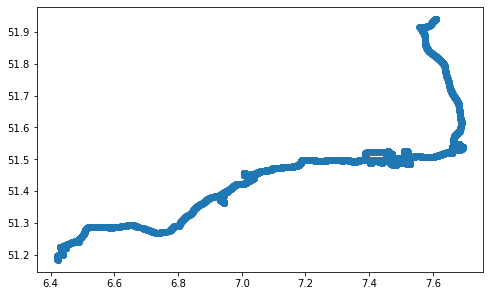

In [8]:
track_df.plot(figsize=(8, 12))

# Summary Statistics (Descriptive Statistics) 
_`by Emekaking`_

In [9]:
## Summarizes all the string values
track_df.describe(include=['object'])

CO2.unit Consumption.unit Engine Load.unit GPS Accuracy.unit  \
count      2490             2490             8863              9613   
unique        1                1                1                 1   
top        kg/h              l/h                %                 %   
freq       2490             2490             8863              9613   

       GPS Altitude.unit GPS Bearing.unit GPS HDOP.unit GPS PDOP.unit  \
count               9613             8876          9034          9034   
unique                 1                1             1             1   
top                    m              deg     precision     precision   
freq                9613             8876          9034          9034   

       GPS Speed.unit GPS VDOP.unit  ...                        id  \
count            9613          9034  ...                      9613   
unique              1             1  ...                      9613   
top              km/h     precision  ...  5bbf571644ea850842fdab86   
freq             9613          9034  ...                         1   

       sensor.fuelType                 sensor.id sensor.manufacturer  \
count             9613                      9613                9613   
unique               2                         6                   4   
top             diesel  57418c7de4b09078f96fb94f          Volkswagen   
freq              7123                      4999                5582   

       sensor.model sensor.type                 time           track.begin  \
count          9613        9613                 9613                  9613   
unique            5           1                 9395                    10   
top         Golf VI         car  2016-06-28T16:45:24  2016-07-04T06:23:18Z   
freq           4999        9613                    2                  1973   

                   track.end                  track.id  
count                   9613                      9613  
unique                    10                        10  
top     2016-07-04T07:31:39Z  577a6d96e4b0ea2464374472  
freq                    1973                      1973  

[4 rows x 30 columns]

In [10]:
# The describe function [describe ()] calculates a summary of the statistics for the dataframe columns.
# Summarizes all the numeric values (whether integer or float) and gives the same result as *track_df.describe(include=['number'])*
track_df.describe()

CO2.value  Consumption.value  Engine Load.value  GPS Accuracy.value  \
count  2490.000000        2490.000000        8863.000000         9613.000000   
mean      8.901228           3.787756          26.414382            4.917918   
std       5.952969           2.533178          19.593990            3.615972   
min       0.000000           0.000000           0.000000            2.836086   
25%       2.882609           1.226643          13.520584            3.000000   
50%       9.019558           3.838110          23.147613            4.000000   
75%      13.267813           5.645878          36.731929            5.000000   
max      37.033501          15.758937         100.000003          118.296218   

       GPS Altitude.value  GPS Bearing.value  GPS HDOP.value  GPS PDOP.value  \
count         9613.000000        8876.000000     9034.000000     9034.000000   
mean           141.682322         158.719744        0.938405        1.261318   
std             24.293701         104.513843        5.155014        5.151156   
min             68.000000        -411.444629        0.600000        0.800000   
25%            125.000004          74.699999        0.800000        1.100000   
50%            146.000000         119.031065        0.900000        1.200000   
75%            158.000000         258.391067        0.900000        1.300000   
max            198.000006         361.522067      490.418332      490.420276   

       GPS Speed.value  GPS VDOP.value  ...  O2 Lambda Current ER.value  \
count      9613.000000     9034.000000  ...                 4999.000000   
mean         57.712472        0.863480  ...                    0.413563   
std          40.099052        5.150463  ...                    0.596244   
min          -0.258167        0.600000  ...                    0.000000   
25%          19.338157        0.800000  ...                    0.124952   
50%          54.899998        0.800000  ...                    0.192045   
75%          94.500002        0.900000  ...                    0.254093   
max         137.859796      490.295814  ...                    1.999939   

       O2 Lambda Current.value  O2 Lambda Voltage ER.value  \
count              4999.000000                 2124.000000   
mean                -11.202292                    0.347948   
std                  67.472727                    0.505718   
min                -128.000004                    0.000000   
25%                 -70.778783                    0.128846   
50%                 -11.394767                    0.155430   
75%                  47.052553                    0.234014   
max                 106.502646                    1.999970   

       O2 Lambda Voltage.value     Rpm.value  Speed.value  \
count              2124.000000   9607.000000  9613.000000   
mean                  1.850838   1774.581935    58.539372   
std                   0.662640   1023.462182    40.606761   
min                   0.000000      0.000000     0.000000   
25%                   1.357489   1105.314071    20.000000   
50%                   1.638007   1703.859060    55.999999   
75%                   2.462732   2233.329861    96.000000   
max                   3.185510  39827.637029   255.000008   

       Throttle Position.value  sensor.constructionYear  \
count              8863.000000              9613.000000   
mean                 78.739595              2011.457505   
std                  21.857271                 1.993171   
min                  17.177542              2007.000000   
25%                  87.999997              2012.000000   
50%                  88.000000              2012.000000   
75%                  88.000003              2013.000000   
max                  94.000003              2013.000000   

       sensor.engineDisplacement  track.length  
count                9613.000000   9613.000000  
mean                 1628.682201     58.778960  
std                   162.645192     24.756086  
min                  1398.000000      0.000000  
25%  

In [11]:
#Finding the number of columns as well as the field names (variables) that exists in the dataframe 
track_df.columns

Index(['CO2.unit', 'CO2.value', 'Consumption.unit', 'Consumption.value',
       'Engine Load.unit', 'Engine Load.value', 'GPS Accuracy.unit',
       'GPS Accuracy.value', 'GPS Altitude.unit', 'GPS Altitude.value',
       'GPS Bearing.unit', 'GPS Bearing.value', 'GPS HDOP.unit',
       'GPS HDOP.value', 'GPS PDOP.unit', 'GPS PDOP.value', 'GPS Speed.unit',
       'GPS Speed.value', 'GPS VDOP.unit', 'GPS VDOP.value',
       'Intake Pressure.unit', 'Intake Pressure.value',
       'Intake Temperature.unit', 'Intake Temperature.value', 'MAF.unit',
       'MAF.value', 'O2 Lambda Current ER.unit', 'O2 Lambda Current ER.value',
       'O2 Lambda Current.unit', 'O2 Lambda Current.value',
       'O2 Lambda Voltage ER.unit', 'O2 Lambda Voltage ER.value',
       'O2 Lambda Voltage.unit', 'O2 Lambda Voltage.value', 'Rpm.unit',
       'Rpm.value', 'Speed.unit', 'Speed.value', 'Throttle Position.unit',
       'Throttle Position.value', 'geometry', 'id', 'sensor.constructionYear',
       'sensor.engine

In [12]:
#Checks the geometry type of each index(records) of the dataframe.
track_df.geom_type

0      Point
1      Point
2      Point
3      Point
4      Point
       ...  
241    Point
242    Point
243    Point
244    Point
245    Point
Length: 9613, dtype: object

In [13]:
# detecting null value and values that are string
track_df.isnull()

CO2.unit  CO2.value  Consumption.unit  Consumption.value  \
0        True       True              True               True   
1        True       True              True               True   
2        True       True              True               True   
3        True       True              True               True   
4        True       True              True               True   
..        ...        ...               ...                ...   
241     False      False             False              False   
242     False      False             False              False   
243     False      False             False              False   
244     False      False             False              False   
245     False      False             False              False   

     Engine Load.unit  Engine Load.value  GPS Accuracy.unit  \
0               False              False              False   
1               False              False              False   
2               False              False              False   
3               False              False              False   
4               False              False              False   
..                ...                ...                ...   
241              True               True              False   
242              True               True              False   
243              True               True              False   
244              True               True              False   
245              True               True              False   

     GPS Accuracy.value  GPS Altitude.unit  GPS Altitude.value  ...  \
0                 False              False               False  ...   
1                 False              False               False  ...   
2                 False              False               False  ...   
3                 False              False               False  ...   
4                 False              False               False  ...   
..                  ...                ...                 ...  ...   
241               False              False               False  ...   
242               False              False               False  ...   
243               False              False               False  ...   
244               False              False               False  ...   
245               False              False               False  ...   

     sensor.fuelType  sensor.id  sensor.manufacturer  sensor.model  \
0              False      False                False         False   
1              False      False                False         False   
2              False      False                False         False   
3              False      False                False         False   
4              False      False                False         False   
..               ...        ...                  ...           ...   
241            False      False                False         False   
242            False      False                False         False   
243            False      False                False         False   
244            False      False                False         False   
245            False      False                False         False   

     sensor.type   time  track.begin  track.end  track.id  track.length  
0          False  False        False      False     False         False  
1          False  False        False      False     False         False  
2          False  False        False      False     False         False  
3          False  False        False      False     False         False  
4          False  False        False      False     False         False  
..           ...    ...          ...        ...       ...           ...  
241        False  False        False      False     False         False  
242        False  False        False      False     False         False  
243        False  False        False      False     False         False  
244        False  False        Fa

# Inspecting a single Track

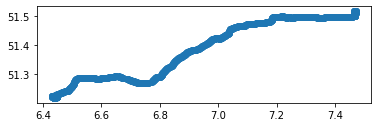

In [14]:
some_track_id = track_df['track.id'].unique()[5]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

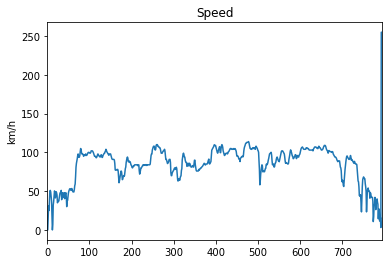

In [15]:
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax

##### Inserting single track with plotly graphic object
_`by EmekaKing`_

In [16]:
import plotly.graph_objs as go

# creating csv file of the geodataframe
mp = track_df.to_csv(r"./G3_EmekaKing_envirocar-py.csv", index=False, encoding='utf-8', header='true')
mpr = pd.read_csv("./G3_EmekaKing_envirocar-py.csv", low_memory = False)

# sort date column
dfm = track_df[track_df['track.id'] == some_track_id]

CO2 = go.Bar(
    x = dfm['time'],
    y = dfm['CO2.value'],
    name = 'CO2 emission {}'.format('kg/h'),
    marker= dict(color = dfm['Speed.value'], opacity= 1, colorscale = 'twilight')
)

Speed = go.Bar(
    x = dfm['time'],
    y = dfm['Speed.value'],
    name = 'Speed of Car {}'.format('km/h'),
    marker= dict(color = dfm['Speed.value'], colorscale = 'plotly3')
)

layout= go.Layout()

fig = go.Figure(data=[CO2, Speed], layout=layout)
fig.show()

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [17]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=11)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [18]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.461603704907996,
    latitude=51.504745450844254,
    zoom=12,
    min_zoom=10,
    max_zoom=16,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state,
    mapbox_key='pk.eyJ1IjoiZW1la2FrIiwiYSI6ImNrOHVpaHYyNzAwazEzZm55MDRwOWJlMmoifQ.Isr5yOekwVkk6zwp6fcevw'
    #, mapbox_key=<mapbox-key-here>
)
r.to_html('tracks_muenster.html', iframe_width=900)

'C:\\Users\\emeka\\Documents\\GitHub\\envirocar-py\\examples\\tracks_muenster.html'

## Visualization with Plotly Python
Using Mapbox Map Layers 
______
_`by Emekaking`_

In [19]:
# import plotly modules
import plotly
import plotly.graph_objs as go
import plotly.express as px

# map of track within the bounding box
df = track_df

fig = px.scatter_mapbox(df, color="CO2.value", 
                    color_continuous_scale=['rgb(0, 204, 150)', 'rgb(214, 69, 80)'], range_color=(0, 1),
                    lat = "lat", lon = "lng", hover_name="track.id", hover_data=["lat", "lng", "time", "GPS Accuracy.value", "CO2.value", "Engine Load.value", "Speed.value", "Consumption.value"],
                    zoom = 10, width = 950, height = 600, center= dict(lon = 7.461603704907996, lat = 51.504745450844254)
                   )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()